# Hypothesis 4: Source Attribution Accuracy

**Hypothesis:** Participants will struggle to differentiate between LLM-generated and human-written content.

This notebook's goal is to analyize the data in regards to the forth hypothesis by calculating the mean accuracy of participants' source guesses per participant.

Additionally, we checked whether the participants' confidence in recognizing AI-generated content had any impact on their actual accuracy. 

### Load preprocessed data

To start, we'll import all relevant libraries needed to test this hypothesis and load the data.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from data_preprocessing import load_and_preprocess
from scipy.stats import pearsonr

# Load and preprocess data
df = load_and_preprocess('data/cleaned_file.csv')

### Create accuracy column

Compare participant labels to the actual source of content

In [10]:
# Create accuracy columns by comparing each guess to df['content_type']
for i in range(1, 7):
    guess_col = f'source_guessing0{i}'
    df[f'accuracy_guess_{i}'] = df[guess_col] == df['content_type']

### Calculate Accuracy per Participant

In [11]:
# Overall guessing accuracy
df['guess_accuracy'] = df[[f'accuracy_guess_{i+1}' for i in range(6)]].mean(axis=1)
print("Average accuracy across all participants:", df['guess_accuracy'].mean())

Average accuracy across all participants: 0.38690476190476186


## Exploring wheter confidence had any impact on the accuracy score

Item CH04 asked for participants confidence in recognizing AI.

### Analyze Confidence in Source Guessing
 

In [8]:
# CH04: Confidence in detecting AI (1=not at all, 5=very much)
df = df.rename(columns={'CH04': 'confidence_ai_detection'})

In [13]:
# Correlation between confidence and accuracy
corr, pval = pearsonr(df['guess_accuracy'], df['confidence_ai_detection'])
print(f"Correlation: r = {corr:.3f}, p = {pval:.3f}")

Correlation: r = 0.132, p = 0.334


## Vizualize Confidence

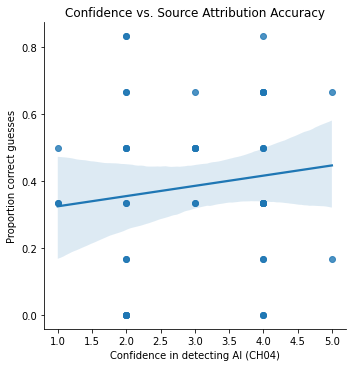

In [14]:
# Scatterplot with regression line
sns.lmplot(x='confidence_ai_detection', y='guess_accuracy', data=df)
plt.title('Confidence vs. Source Attribution Accuracy')
plt.xlabel('Confidence in detecting AI (CH04)')
plt.ylabel('Proportion correct guesses')
plt.show()

### Conclusion

 On average, participants correctly guessed the source in only 38.7% of cases. Confidence in detecting AI (CH04) did not correlate with actual accuracy (p > 0.05).